In [2]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import csv
import matplotlib.pyplot as plt

2024-11-09 10:02:33.618966: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 10:02:35.000311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-09 10:02:36.213722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Reading Data with Pandas

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Reading Data with CSV

In [8]:



# Check the shape of the loaded data
print(f'Train data shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')


Train data shape: (60000, 28, 28)
Train labels shape: (60000,)


In [10]:


# Check the shape of the loaded test data
print(f'Test data shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')


Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
test_data.shape

(10000, 784)

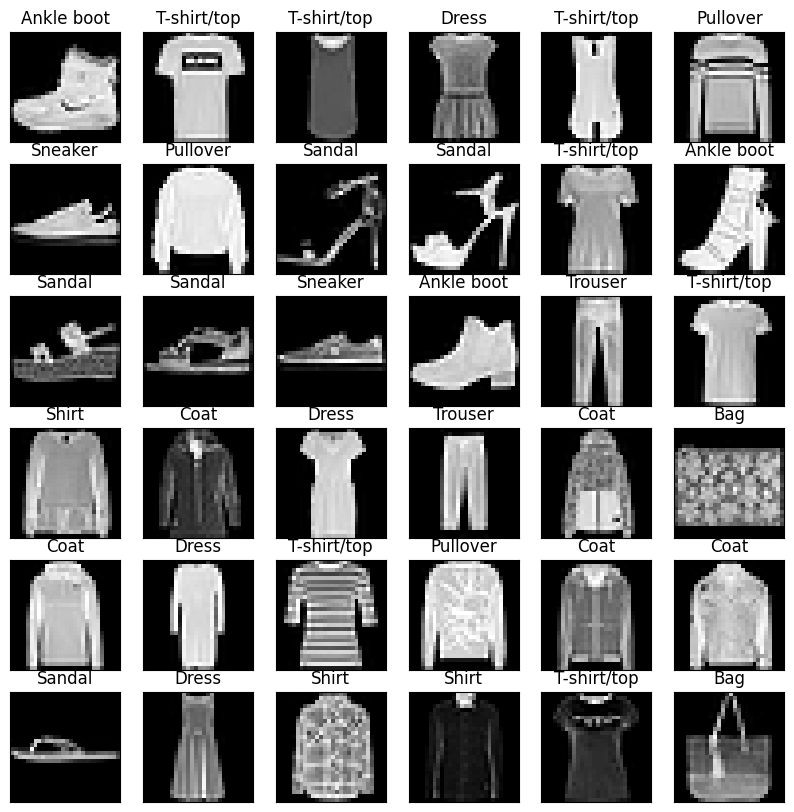

In [11]:

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Set up the figure size
plt.figure(figsize=(10, 10))

# Display the first 36 images
for i in range(36):
    plt.subplot(6, 6, i + 1)  # Create a 6x6 grid of subplots
    plt.xticks([])  # Remove x ticks
    plt.yticks([])  # Remove y ticks
    plt.grid(False)  # Disable grid
    plt.imshow(train_images[i].reshape((28, 28)), cmap='gray')  # Reshape and display image
    label_index = int(train_labels[i])  # Get the corresponding label index
    plt.title(class_names[label_index])  # Set the title to the class name

# Show the plot
plt.show()


In [13]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 

In [14]:
x_train = train_images.reshape(train_images.shape[0],*image_shape)
x_test = test_images.reshape(test_images.shape[0],*image_shape)

In [15]:
x_test.shape

(10000, 28, 28, 1)

In [16]:
model = tf.keras.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=image_shape),
    tf.keras.layers.BatchNormalization(),  # Batch normalization for improved stability
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten the output and feed it to dense layers
    tf.keras.layers.Flatten(),
    
    # Fully connected layers
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Another dropout layer
    tf.keras.layers.Dense(10, activation='softmax'),  # Output layer for 10 classes
])

/home/amr/Desktop/my env for python/.myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-09 10:14:11.686858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-09 10:14:11.815756: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu fo

In [17]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [18]:
history = model.fit(x_train,train_labels,epochs=40,verbose=1,validation_split=0.2)

Epoch 1/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.6972 - loss: 0.8707 - val_accuracy: 0.8339 - val_loss: 0.4546
Epoch 2/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.8471 - loss: 0.4360 - val_accuracy: 0.8460 - val_loss: 0.4128
Epoch 3/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8697 - loss: 0.3681 - val_accuracy: 0.8479 - val_loss: 0.4085
Epoch 4/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.8789 - loss: 0.3419 - val_accuracy: 0.8537 - val_loss: 0.3742
Epoch 5/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.8898 - loss: 0.3124 - val_accuracy: 0.8763 - val_loss: 0.3577
Epoch 6/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.8985 - loss: 0.2911 - val_accuracy: 0.8924 - val_loss: 0.2969
Epoch 7/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9057 - loss: 0.2678 - val_accuracy: 0.8474 - val_loss: 0.4019
Epoch 8/40
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9095 -

In [19]:
model.evaluate(x_test,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8839 - loss: 0.6972


[0.6367014646530151, 0.8831999897956848]

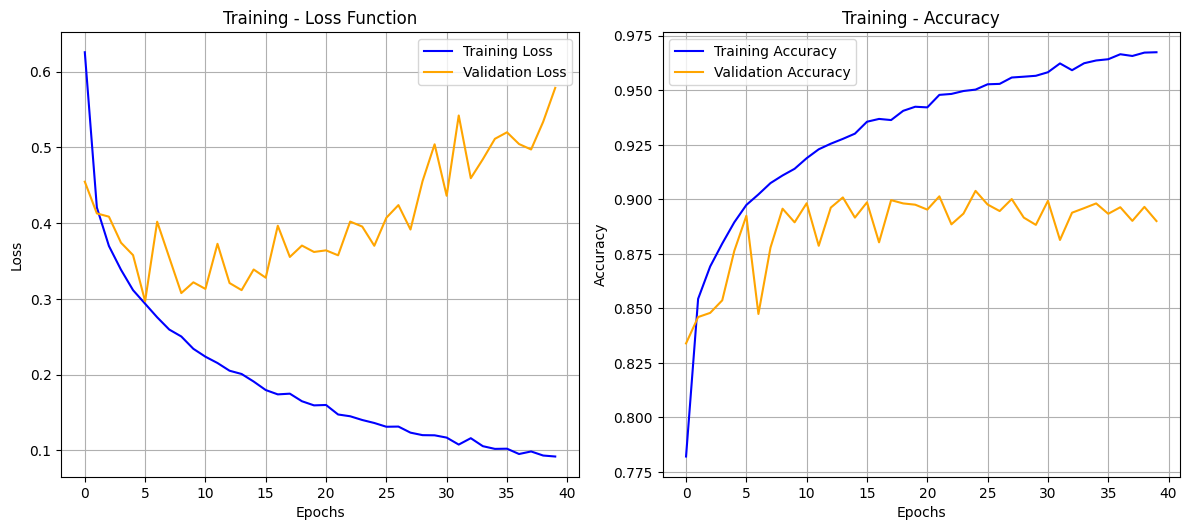

In [20]:


# Create a figure for plotting
plt.figure(figsize=(12, 10))

# Subplot for Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.legend()
plt.grid(True)
plt.title('Training - Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Subplot for Accuracy
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.legend()
plt.grid(True)
plt.title('Training - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Show the plots
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


# Saving and Loading the Trained Model

In [21]:
model.save('cnn_model.keras')

In [ ]:
loaded_model = tf.keras.models.load_model('cnn_model.keras')

## Tesing with New Image

In [ ]:
import cv2
import numpy as np

In [ ]:
testing_image = cv2.imread('test.jpg')
gray_image = cv2.cvtColor(testing_image,cv2.COLOR_BGR2GRAY)
th,im  = cv2.threshold(gray_image,100,255,cv2.THRESH_BINARY_INV)
resized_image = cv2.resize(im,(28,28))
reshaped_image = resized_image.reshape(-1,28,28,1)
arr_image = np.array(reshaped_image,dtype='float32')
prediction = loaded_model.predict(arr_image)
print(np.argmax(prediction))

NameError: name 'np' is not defined

# Building Flask API With Streamlit Interface

In [ ]:
from flask import Flask, request, jsonify


app = Flask(__name__)


@app.route('/predict', methods=['POST'])
def predict():
    
    file = request.files['file']
    
    testing_image = cv2.imdecode(np.fromstring(file.read(), np.uint8), cv2.IMREAD_UNCHANGED)
    gray_image = cv2.cvtColor(testing_image, cv2.COLOR_BGR2GRAY)
    th, im = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
    resized_image = cv2.resize(im, (28, 28))
    reshaped_image = resized_image.reshape(-1, 28, 28, 1)
    arr_image = np.array(reshaped_image, dtype='float32')
    
    prediction = loaded_model.predict(arr_image)
    
   
    predicted_class = np.argmax(prediction)
    
    
    return jsonify({'predicted_class': int(predicted_class)})

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
import streamlit as st
import requests
import cv2
import numpy as np


st.title('CNN Image Classifier')

uploaded_file = st.file_uploader("Upload an image", type=['jpg', 'jpeg', 'png'])


def predict_image_class(image):

    files = {'file': image}
    response = requests.post("http://127.0.0.1:5000/predict", files=files)
    predicted_class = response.json()['predicted_class']
    return predicted_class

def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    th, im = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
    resized_image = cv2.resize(im, (28, 28))
    reshaped_image = resized_image.reshape(-1, 28, 28, 1)
    arr_image = np.array(reshaped_image, dtype='float32')
    return arr_image


if uploaded_file is not None:

    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    

    processed_image = preprocess_image(image)
    

    predicted_class = predict_image_class(processed_image)
    

    st.write(f"Predicted Class: {predicted_class}")
